# Fake Job Posting Analysis
## Introduction

With the increase of data, there is an increase in false information as well such as fake news, job scams, false advertising and so on. Since finding a job through online job postings was a real challenge for me, I decided to analyze job postings and find out differences between real and fake ones.

The dataset, [Real or Fake] : Fake Job Description Prediction, was retrieved from [website Kaggle](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), which is originally from Laboratory of Information & Communication Systems Security of University of the Aegean (Greece). This is a public dataset of 17,880 real-life job ads where there are 17,014 legitimate and 866 fraudulent job ads published between 2012 and 2014. Dataset consists of 17,880 rows and 18 columns.

## Downloading the Dataset

Let's download dataset directly from Kaggle website by using dataset's url. This way, there is no need to download csv file and upload it back to Jupyter.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

We'll begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction'

We'll use the `opendatasets` helper library to download the files.

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: almagu1
Your Kaggle Key: ········


100%|██████████| 16.1M/16.1M [00:00<00:00, 93.8MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './real-or-fake-fake-jobposting-prediction'

Let's verify that the dataset was downloaded into the directory `real-or-fake-fake-jobposting-prediction`, and retrieve the list of files in the dataset. In the directory we have only one CSV file.

In [5]:
import os
os.listdir(data_dir)

['fake_job_postings.csv']

We'll load the CSV file using the Pandas library and use the name `jobposts_raw_df` for the data frame, to indicate that this is an unprocessed data which we might clean, filter and modify to make ready the data frame for analysis.

In [6]:
import pandas as pd

In [7]:
jobposts_raw_df = pd.read_csv(data_dir + '/fake_job_postings.csv')
jobposts_raw_df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


The dataset contains about 18K job postings with 17 more details such as department, location, description and so on. There are 5 columns with numeric values and a fraudulent column which indicates that a certain job posting is a fake or real.

Let's view the list of columns in the data frame.

In [8]:
jobposts_raw_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Let's look at one of the job descriptions from dataset using `.loc`. Same can be applied to other text values to see the full text from dataset.

In [9]:
jobposts_raw_df.loc[17,'description']

'Government funding is only available for 16-18 year olds.We have 10 vacancies for career driven, highly motivated individuals living in the Southend-On-Sea area.You will complete a 4 week traineeship before starting your apprenticeship in Customer Service. You will receive full training and support for the training provider.Please apply now and you will be invited to attend the open day.'

Let's load one more dataset for country codes and rename columns. We will need this dataset for full country names. This dataset was retrieved from [website](https://datahub.io/core/country-list#data). We'll download this file using the `urlretrieve` function from the `urllib.request` module.

In [10]:
from urllib.request import urlretrieve
urlretrieve('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv', 
            'country_codes.csv')
country_codes_df = pd.read_csv('country_codes.csv')
country_codes_df

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [11]:
country_codes_df.rename(columns={'Name': "country", 'Code': "country_code"}, inplace = True)
country_codes_df

,country,country_code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


We've now loaded the datasets, and we are ready to move on to the next step of preprocessing and cleaning the data for our analysis.

Let us save and upload our work to Jovian before continuing.

In [12]:
project_name = "fake-job-posting-analysis"

In [13]:
!pip install jovian --upgrade -q

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name, files = ['real-or-fake-fake-jobposting-prediction', 'country_codes.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "almashka/fake-job-posting-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/almashka/fake-job-posting-analysis


'https://jovian.ml/almashka/fake-job-posting-analysis'

## Data Preparation and Cleaning

In this step, we will prepare and clean the data for analysis by looking for missing values and invalid data. Before cleaning, we need to look closer at details and filter out some extra information, if needed.

Let's limit our analysis to the following areas, despite having a rich text values for deeper insights:

- Geolocation of job postings such as country and state
- Relation of industry to fraudulent job postings
- Employment type, company logo related information


Let's view some basic information about the data frame.

In [16]:
jobposts_raw_df.shape

(17880, 18)

In [17]:
jobposts_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Most columns have the data type `object`, either because they contain values of different types, or they contain empty values, which are represented using `NaN`. It appears that some columns contain some missing values, since the Non-Null count for every column is lower than the total number of rows, that is 17,880. We'll need to deal with empty values and adjust the data type for certain columns, if needed.

Five of the columns were detected as numeric columns (`job_id`, `telecommuting`, `has_company_logo`, `has_questions` and `fraudulent`), even though there is one more column (`salary_range`) which most likely have numeric values. To make our analysis easier, let's keep `salary_range` column intact since it is a _range of values_ which might be converted to NaNs that will lead to a loss of actual data. The only thing we can change is that, we can split location into country, state and city columns, and drop some excess columns.

There is one job posting with missing description. Let's check if there are any other information.

In [18]:
missing_decription = jobposts_raw_df[jobposts_raw_df['description'].isnull()]
missing_decription

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


Here we can see that above job posting does not contain any information rather than title and location. We will still keep this record for our analysis.

Let's now view some basic statistics about the the numeric columns.

In [19]:
jobposts_raw_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Here we can see that columns `telecommuting`, `has_company_logo`, `has_questions` and `fraudulent` contain binary values, since minimum is 0 and maximum is 1 as well as other percentiles are either 0 or 1. Also, `job_id` column simply can be removed since it does not bring any information rather being as an index of table.

Let's select a subset of columns with the relevant data for our analysis. Then, extract a copy of the data from these columns into a new data frame `jobposts_df`, which we can continue to modify further without affecting the original data frame.

In [20]:
selected_columns = ['title','location','salary_range','company_profile','description','requirements',
                   'benefits','has_company_logo','employment_type','required_experience','required_education',
                   'industry','function','fraudulent']
len(selected_columns)

14

In [21]:
jobposts_df = jobposts_raw_df[selected_columns].copy()
jobposts_df.head()

,title,location,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Let's split your `location` column for our geographical analysis.

In [22]:
location = jobposts_df['location'].str.split(',', n = 2, expand = True)
location.rename(columns={0: "country_code", 1: "state", 2: "city"}, inplace = True)
location

,country_code,state,city
0,US,NY,New York
1,NZ,,Auckland
2,US,IA,Wever
3,US,DC,Washington
4,US,FL,Fort Worth
...,...,...,...
17875,CA,ON,Toronto
17876,US,PA,Philadelphia
17877,US,TX,Houston
17878,NG,LA,Lagos


We will append the previously splitted columns that are country, state and city to our main dataset, and remove the previous `location` column.

In [23]:
jobposts_df['city'] = location['city']
jobposts_df['state'] = location['state']
jobposts_df['country_code'] = location['country_code']

del jobposts_df['location']

In [24]:
jobposts_df = jobposts_df.merge(country_codes_df, on="country_code")
jobposts_df

,title,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,city,state,country_code,country
0,Marketing Intern,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,Other,Internship,NaN,NaN,Marketing,0,New York,NY,US,United States
1,Commissioning Machinery Assistant (CMA),NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,Wever,IA,US,United States
2,Account Executive - Washington DC,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Washington,DC,US,United States
3,Bill Review Manager,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Fort Worth,FL,US,United States
4,Accounting Clerk,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,,MD,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Teaching Placement Coordinator in Sri Lanka,0-0,SLV is a graduate led volunteer organisation i...,The Teaching Placement is suited to those seek...,• Relevant Experience for one or more of the p...,All or part of expenses whilst are covered by ...,0,Full-time,Not Applicable,NaN,Education Management,Education,0,,,LK,Sri Lanka
17876,Content Ninja,NaN,JadoPado is an e-commerce adventure for the In...,JadoPado is looking for the right individual t...,A Content Ninja must:1. Possess excellent Engl...,A Content Ninja will receive:1. 2 weeks of lea...,1,Full-time,Entry level,Bachelor's Degree,Internet,Writing/Editing,0,Colombo,,LK,Sri Lanka
17877,Risk and Asset Officer,NaN,NaN,To oversee the operations of the records unit ...,B.Sc. in Management/Accounting or equivalent q...,Basic salaryTravelling Allowance Health Insura...,0,Full-time,Not Applicable,Bachelor's Degree,Government Administration,Administrative,0,Kingston,01,JM,Jamaica
17878,TEFL Teacher,9240-13200,"We place highly qualified governors, governess...",TEFL teaching positions with Linking GB Intern...,QualificationsIdeal candidates for an EFL Teac...,Compensation:9 or 12 month contracts for Teach...,1,Full-time,Not Applicable,Bachelor's Degree,Staffing and Recruiting,Education,0,,ALA,KZ,Kazakhstan


Now, we've cleaned up and prepared the dataset for analysis. Let's take a look at sample of rows from the data frame.

In [25]:
jobposts_df.sample(10)

,title,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,city,state,country_code,country
16050,Point Nine Talent Pool,NaN,Point Nine Capital is a Berlin-based venture c...,If you are interested to work in one of our po...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Namibia
13974,TLL (Chinese Lab) - Specialist Teaching Associate,NaN,Shape the Future.The Learning Lab is Singapore...,Future China for Future Leaders.Chinese Lab is...,Our Chinese Lab teaching associates are passio...,NaN,1,Full-time,NaN,Bachelor's Degree,Education Management,Education,0,,,SG,Singapore
7951,Wireless Sales Consultants Wanted - Hiring Thi...,NaN,NaN,"INTERVIEW TODAY, START TOMORROW! Opportunitie...",NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,San Antonio,TX,US,United States
13671,Senior Ruby on Rails Developer,40000-65000,NaN,As a Senior Developer you will be involved in ...,"What we like…Ruby on Rails (preferably 3+)CSS,...","What we offer… Up to £65,000 per year + Mac or PC",1,Full-time,Mid-Senior level,Bachelor's Degree,"Leisure, Travel & Tourism",Information Technology,0,london,LND,GB,United Kingdom
13146,Visual Designer,NaN,Acknowledgement helps brands and organisations...,** NO RECRUITMENT AGENCIES PLEASE **Acknowledg...,As a Visual Designer at Acknowledgement you wi...,NaN,1,Full-time,Mid-Senior level,NaN,Computer Software,NaN,0,London,LND,GB,United Kingdom
2596,"Producer, Hausa Language",NaN,Applied Memetics LLC is a professional service...,The Producer shall have at least three years o...,The Producer shall properly complete all daily...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Broadcast Media,NaN,0,Washington,DC,US,United States
14990,"Senior Java Developers (Java, Scala, Hadoop, C...",NaN,Merchenta’s behavioural advertising platform i...,"Due to further growth, we are seeking addition...","Key responsibilities• Design, development and ...","The role brings with it a competitive salary, ...",1,Full-time,Mid-Senior level,Unspecified,Computer Software,Engineering,0,Krakow,MA,PL,Poland
12478,Web Application Developer,NaN,"Working in over 60 countries and 30 languages,...",Role Summary#URL_8b5fe34131f015b09e2b4b0109739...,Degree level qualification or equivalent exper...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,,,GB,United Kingdom
11542,Senior Software Developer,NaN,Adthena is the UK’s leading competitive intell...,Do you want to come and work on some big data ...,"You'll need to be smart, passionate and have a...","In return we'll pay you well, give you some ow...",1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Engineering,0,Shoreditch,LND,GB,United Kingdom
655,Graphic Design Intern (Paid),NaN,Maker’s Row is an online marketplace that conn...,About Maker's RowMaker’s Row is the future of ...,QualificationsCurrently a student or a recent ...,We Offer InternsOpportunity to be contribute i...,1,Full-time,Internship,Some College Coursework Completed,Design,Design,0,Brooklyn,NY,US,United States


In [26]:
import jovian

In [27]:
jovian.commit(files = ['real-or-fake-fake-jobposting-prediction', 'country_codes.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "almashka/fake-job-posting-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/almashka/fake-job-posting-analysis


'https://jovian.ml/almashka/fake-job-posting-analysis'

## Exploratory Analysis and Visualization

Before asking interesting questions about the job postings dataset, it would help to understand what the location, salary range, industry, employment type, requirements, etc. of the jobs look like. It's important to explore these variables in order to understand how these variables can relate to fake job postings and how we can detect some patterns from these relations.

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's check how many fake job postings are there.

In [29]:
fake_jobs = jobposts_df.fraudulent.value_counts()
fake_jobs

0    17014
1      866
Name: fraudulent, dtype: int64

There are 866 fake jobs in the dataset. We can visualize this information using a bar chart.

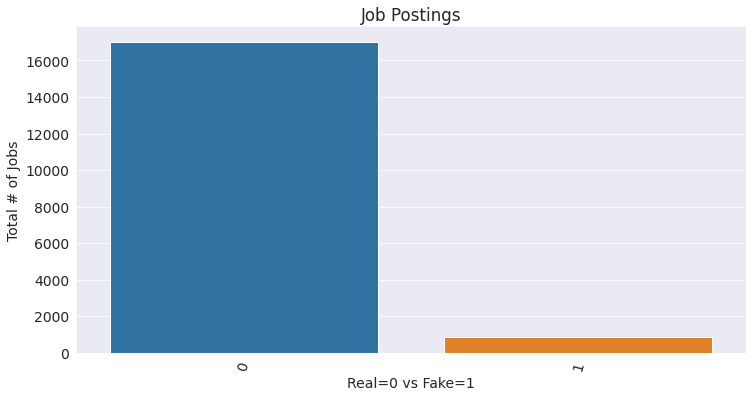

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Job Postings')
sns.barplot(fake_jobs.index, fake_jobs);
plt.xlabel('Real=0 vs Fake=1')
plt.ylabel('Total # of Jobs');

It appears that number of fake jobs are significantly low, under 2000, with respect to real ones where there are more than 16000 job postings.

Let's look at the number of countries with the highest number of fake job postings and plot top 10 ones. We will check also how many countries are there in the dataset.

In [31]:
print('There are {} countries in the dataset.'.format(jobposts_df.country.nunique()))

There are 91 countries in the dataset.


In [32]:
topfake_job_listings = jobposts_df.groupby('country')[['fraudulent']].sum()
topfake_job_listings = topfake_job_listings.sort_values('fraudulent',ascending=False).head(10)
topfake_job_listings

,fraudulent
country,
United States,730
Australia,40
United Kingdom,23
Namibia,19
Canada,12
Malaysia,12
Qatar,6
Bahrain,5
India,4


Let's look at the United States' statewise fake job postings and see the highest rate of fake jobs in each state.

In [33]:
states = jobposts_df[jobposts_df['country']=='United States'].groupby(['state'])[['fraudulent']].sum().sort_values('fraudulent',ascending=False).head(10)
states

,fraudulent
state,
TX,152
CA,143
NY,68
MD,35
,34
FL,30
GA,20
IL,18
OH,18


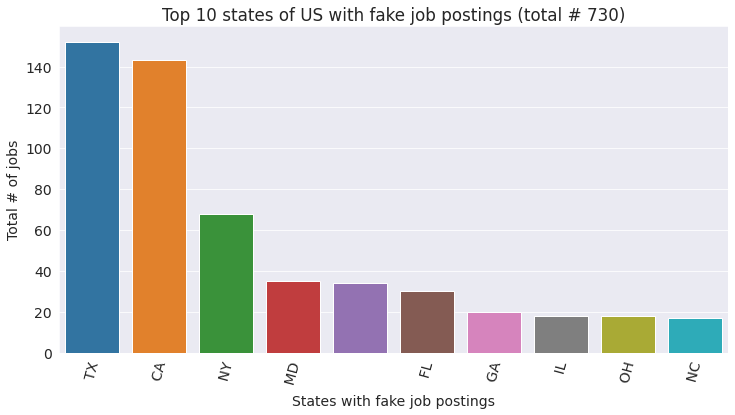

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 states of US with fake job postings (total # 730)')
sns.barplot(states.index, states.fraudulent);
plt.xlabel('States with fake job postings')
plt.ylabel('Total # of jobs');

Here we can see that Texas, California and New York are the top states with fake job postings. Also, there is one unknown state as well.

Let's now see which industry has the highest number of fake jobs in United States.

In [35]:
us_industry = jobposts_df[jobposts_df['country']=='United States'].groupby(['industry'])[['fraudulent']].sum().sort_values('fraudulent',ascending=False).head(10)
us_industry

,fraudulent
industry,
Oil & Energy,106
Accounting,50
Hospital & Health Care,49
Marketing and Advertising,39
Information Technology and Services,31
Financial Services,27
Real Estate,24
Telecommunications,24
Consumer Services,22


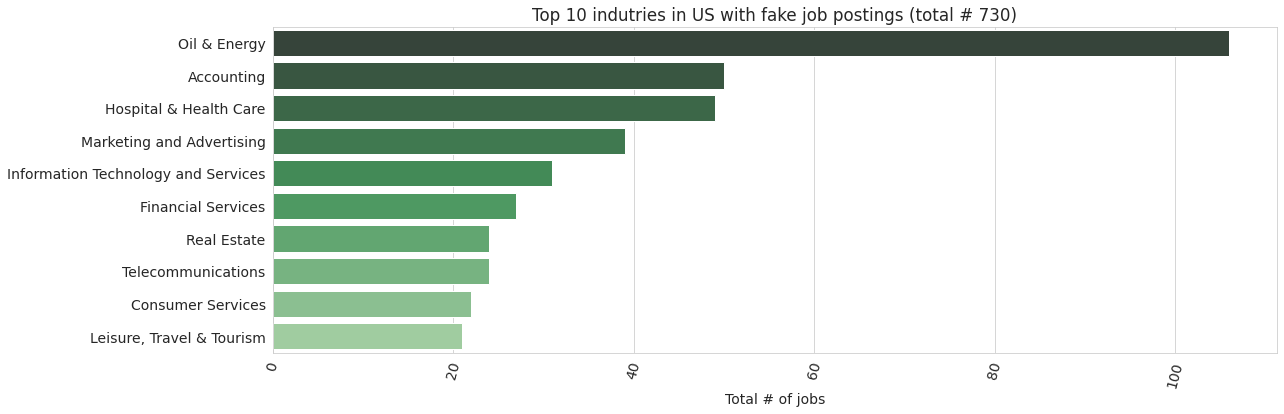

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.title('Top 10 indutries in US with fake job postings (total # 730)')
sns.barplot(us_industry.fraudulent, us_industry.index, palette="Greens_d");
plt.xlabel('Total # of jobs')
plt.ylabel(None);


Looking at industries, oil & enegry, tech, health care, finance and marketing industries are at the top. Here, we can relate why Texas, California and New York were top states by fake job postings.

Let's look at fake job postings according to emplyment types.

In [37]:
employment_type = jobposts_df.groupby(['employment_type'])[['fraudulent']].sum()
employment_type

,fraudulent
employment_type,
Contract,44
Full-time,490
Other,15
Part-time,74
Temporary,2


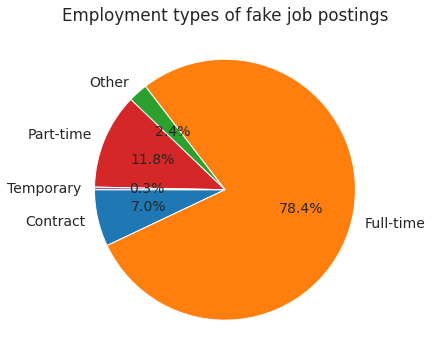

In [38]:
plt.figure(figsize=(12,6))
plt.title("Employment types of fake job postings")
plt.pie(employment_type.fraudulent, labels=employment_type.index, autopct='%1.1f%%', startangle=180);

It appears 78.4% of fake job posts are full-time and 11.8% are part-time. Only 625 job posts have an employment type, the rest 241 job posts have not specified employment types.

Let's see if having a company logo mean something.

In [39]:
company_logo = jobposts_df.groupby(['has_company_logo'])[['fraudulent']].sum()
company_logo

,fraudulent
has_company_logo,
0,583
1,283


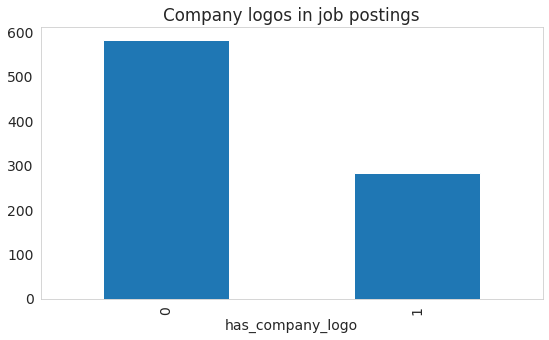

In [40]:
company_logo.fraudulent.plot(kind='bar', title='Company logos in job postings', grid=False);

Around 300 fake job postings does not have a company logo, whereas, around 500 postings are with logo. Having a company logo does not relate to job postings genuinity, since job postings by themselves might be false.

Let us save and upload our work to Jovian before continuing

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "almashka/fake-job-posting-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/almashka/fake-job-posting-analysis


'https://jovian.ml/almashka/fake-job-posting-analysis'

## Asking and Answering Questions

We've already gained some insights about the fraudulent job postings and the dataset in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.


> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What is the overall fake job posting rate according to our dataset?

In [43]:
fake_job_rate = jobposts_df.fraudulent.mean()

In [44]:
print("The overall fake job posting rate is {:.2f} %.".format(fake_job_rate*100))

The overall fake job posting rate is 4.84 %.


#### Q2: How many 'developer' jobs are there?

We will use `str.contains` function to look for _developer_ keyword in our dataset.

In [45]:
developer_jobs = jobposts_df[jobposts_df.title.str.contains('developer', case=False, regex=False)]

In [46]:
developer_jobs

,title,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,city,state,country_code,country
8,ASP.net Developer Job opportunity at United St...,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,Jersey City,NJ,US,United States
9,"Applications Developer, Digital",NaN,"Novitex Enterprise Solutions, formerly Pitney ...","The Applications Developer, Digital will devel...",Requirements:4 – 5 years’ experience in develo...,NaN,1,Full-time,Associate,Bachelor's Degree,Management Consulting,Information Technology,0,Stamford,CT,US,United States
27,Jr. Developer,40000-50000,NaN,Entry level Software DeveloperLocation : Atlan...,NaN,NaN,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0,None,None,US,United States
54,Mid-Senior .NET or Xamarin Developer,75-115,NaN,DataFinch Technologies is the leader in electr...,We are looking for candidates who are generall...,"Health, Vision, Dental, FSA, HSA, 401(k)Privat...",0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,Atlanta,GA,US,United States
103,Web Developer,NaN,Yazamo is a rapidly growing digital lifecycle ...,If you are you a talented Web Developer who wa...,"Strong front-end development skills: HTML5, C...",Competitive salary at all experience levelsExp...,1,Full-time,Associate,Unspecified,Marketing and Advertising,Information Technology,0,Phoenix,AZ,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17848,Senior WebDeveloper,NaN,What is ColorElephant?At ColorElephant we're i...,We're looking for a webdeveloper to lead our p...,Candidate MUST send code examples.Knows how to...,Fair Salary based on candidate profileMedical ...,1,Full-time,Mid-Senior level,Unspecified,Information Technology and Services,Engineering,0,Porto,13,PT,Portugal
17850,"UK Market Developer (paid, full-time internship)",NaN,"We are an international, venture backed team m...","UK Market Developer (paid, full-time internshi...",RequirementsMarket knowledge about the UK educ...,What you getDirect contact with the senior tea...,1,Full-time,Internship,Bachelor's Degree,Internet,Marketing,0,Lisbon,11,PT,Portugal
17851,Full Stack Developer,NaN,Independent team of Designers &amp; Developers...,Pixelmatters is looking to hire a full-time Fu...,Degree in Computer Science (Bachelor’s or Mast...,Competitive salaryCreative and collaborative w...,1,Full-time,Associate,Bachelor's Degree,Computer Software,Engineering,0,Porto,,PT,Portugal
17852,Front-end Developer,NaN,Independent team of Designers &amp; Developers...,Pixelmatters is looking to hire a full-time Fr...,Degree in Computer Science (Bachelor’s or Mast...,Competitive salaryCreative and collaborative w...,1,Full-time,Associate,Bachelor's Degree,Computer Software,Engineering,0,Porto,,PT,Portugal


It appears that there are also other developers rather than sofware ones such as business.

In [47]:
print('There are {} developer job postings.'.format(developer_jobs.title.count()))

There are 1889 developer job postings.


#### Q3: How many of 'developer' jobs are fake?

In [48]:
fake_developer_jobs = developer_jobs.groupby('fraudulent')[['title']].count()
fake_developer_jobs

,title
fraudulent,
0,1871
1,18


In [49]:
print('There are {} fake job postings with "developer" keyword in title.'.format(fake_developer_jobs.loc[1]['title']))

There are 18 fake job postings with "developer" keyword in title.


Let's see fake developer jobs in a pie chart, where 0 stands for **real** jobs and 1 for **fake** jobs.

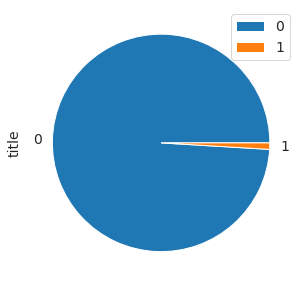

In [50]:
fake_developer_jobs.plot.pie(y='title', figsize=(5, 5));

#### Q4: What is the rate of US job postings with respect to other countries?

In [51]:
us_jobs = jobposts_df[jobposts_df['country']=='United States'].count()
us_job_rate = us_jobs/jobposts_df.country.count()*100

In [52]:
us_job_rate

title                  59.597315
salary_range            8.708054
company_profile        47.986577
description            59.597315
requirements           49.675615
benefits               33.411633
has_company_logo       59.597315
employment_type        49.742729
required_experience    35.637584
required_education     34.558166
industry               44.597315
function               37.762864
fraudulent             59.597315
city                   59.244966
state                  59.244966
country_code           59.597315
country                59.597315
dtype: float64

In [53]:
print("The United States job posting rate is {:.2f} %.".format(us_job_rate.country))

The United States job posting rate is 59.60 %.


More than half of all job posts are located in United States, that is 60%.

Let us save and upload our work to Jovian before continuing.

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "almashka/fake-job-posting-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/almashka/fake-job-posting-analysis


'https://jovian.ml/almashka/fake-job-posting-analysis'

## Inferences and Conclusion

To sum up, there is a low rate of fake job posts and most job postings are for United States, almost 60%. This might be due to other countries' unknown career boards or websites. <br>
There are top five industries with fake job posts like oil and energy, accounting, health care, tech and business. Since we have looked at US jobs, there were top three states with highest rate of fake jobs that are Texas, California and New York.<br>
It appears that by analyzing mostly numeric values for job posts does not give a proper information, thus, doing a text analysis might give clearer insights.

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "almashka/fake-job-posting-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/almashka/fake-job-posting-analysis


'https://jovian.ml/almashka/fake-job-posting-analysis'

## References and Future Work

For future, making a text analysis might give a deep understanding of fake job posts and create a different pattern of detecting real and fake posts.

In [58]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
